<a href="https://colab.research.google.com/github/kugmax/tensorflow_learn/blob/master/Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
tf.enable_eager_execution()

In [10]:
x = tf.zeros([10, 10])
x += 2
print(x)
print(x.shape)

tf.Tensor(
[[2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]], shape=(10, 10), dtype=float32)
(10, 10)


In [11]:
v = tf.Variable(1.0)
print(v == 1.0)
print(v.numpy() == 1.0)
print(v)
print(v.numpy())

False
True
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.0>
1.0


In [14]:
class Model(object):
  def __init__(self):
    self.W = tf.Variable(5.0)
    self.b = tf.Variable(0.0)
    
  def __call__(self, x):
    return self.W * x + self.b
  
model = Model()  

print(model(3.0).numpy() == 15.0) 

True


In [0]:
def loss(predictd_y, desired_y):
  return tf.reduce_mean( tf.square(predictd_y - desired_y) )

In [0]:
TRUE_W = 3.0
TRUE_b = 2.0
NUM_EXAMPLE = 1000

inputs = tf.random_normal(shape=[NUM_EXAMPLE])
noise = tf.random_normal(shape=[NUM_EXAMPLE])
outputs = inputs * TRUE_W + TRUE_b + noise

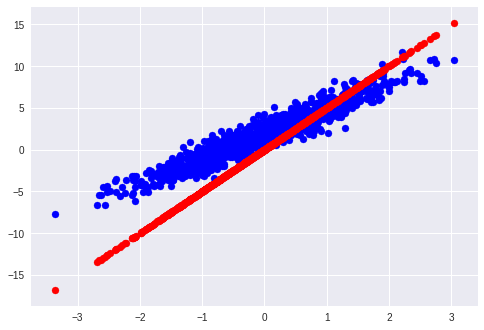

Current loss: 
8.938043


In [18]:
import matplotlib.pyplot as plt

plt.scatter(inputs, outputs, c='b')
plt.scatter(inputs, model(inputs), c='r')

plt.show()
print('Current loss: ')
print(loss(model(inputs), outputs).numpy())

In [0]:
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
    
    dW, db = t.gradient(current_loss, [model.W, model.b])
    model.W.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

Epoch  0: W=5.00 b=0.00, loss=8.93804
Epoch  1: W=3.96 b=0.98, loss=2.83765
Epoch  2: W=3.46 b=1.47, loss=1.38467
Epoch  3: W=3.22 b=1.71, loss=1.03796
Epoch  4: W=3.10 b=1.83, loss=0.95507
Epoch  5: W=3.05 b=1.90, loss=0.93522
Epoch  6: W=3.02 b=1.93, loss=0.93045
Epoch  7: W=3.01 b=1.94, loss=0.92931
Epoch  8: W=3.01 b=1.95, loss=0.92903
Epoch  9: W=3.00 b=1.95, loss=0.92896


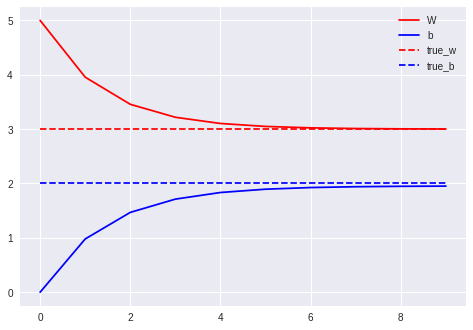

In [30]:
model = Model()
Ws, bs = [], []
epochs = range(10)

for epoch in epochs:
  Ws.append(model.W.numpy())
  bs.append(model.b.numpy())
  current_loss = loss(model(inputs), outputs)
  
  train(model, inputs, outputs, learning_rate = 0.25)
  print('Epoch %2d: W=%1.2f b=%1.2f, loss=%2.5f' 
        % (epoch, Ws[-1], bs[-1], current_loss ))
      
plt.plot(epochs, Ws, 'r', epochs, bs, 'b')
plt.plot([TRUE_W] * len(epochs), 'r--',
           [TRUE_b] * len(epochs), 'b--')
plt.legend(['W', 'b', 'true_w', 'true_b'])
plt.show()

In [0]:
# Custom layers

In [39]:
class MyDenseLayer(tf.keras.layers.Layer):
  def __init__(self, num_outputs):
    super(MyDenseLayer, self).__init__()
    self.num_outputs = num_outputs
    
  def build(self, input_shape):
    self.kernel = self.add_variable("kernel", 
                                    shape= [int(input_shape[-1]), 
                                            self.num_outputs]
                                   )
  def call(self, input):
    return tf.matmul(input, self.kernel)
  
  
layer = MyDenseLayer(10)

print(layer(tf.zeros([10, 5])))
print(layer.variables)

tf.Tensor(
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]], shape=(10, 10), dtype=float32)
[<tf.Variable 'my_dense_layer_3/kernel:0' shape=(5, 10) dtype=float32, numpy=
array([[-2.9230899e-01,  3.5404295e-01,  4.4773620e-01, -2.8072339e-01,
         3.5690308e-02, -1.8938243e-01, -8.4578216e-02, -1.5376753e-01,
         1.0771352e-01,  2.3322272e-01],
       [-3.7067518e-01, -5.4549253e-01, -1.6326198e-01,  1.4559537e-01,
         5.7696050e-01, -3.1457254e-01, -5.7345688e-01,  2.1465600e-02,
         1.4600933e-02,  8.2926512e-02],
       [ 5.9266132e-01,  2.3407286e-01,  1.5621001e-01,  2.5949484e-01,
         1.6292572e-01,  2.1289271e-01,  4.1357797e-01,  1.1811781e-01,
         5.6842983e-02,  4.1632670

In [5]:
class ResnetIdentityBlock(tf.keras.Model):
  def __init__(self, kernel_size, filters):
    super(ResnetIdentityBlock, self).__init__(name='')
    filters1, filters2, filters3 = filters
    
    self.conv2a = tf.keras.layers.Conv2D(filters1, (1, 1))
    self.bn2a = tf.keras.layers.BatchNormalization()
    
    self.conv2b = tf.keras.layers.Conv2D(filters2, kernel_size, padding='same')
    self.bn2b = tf.keras.layers.BatchNormalization()
    
    self.conv2c = tf.keras.layers.Conv2D(filters3, (1, 1))
    self.bn2c = tf.keras.layers.BatchNormalization()
    
  def call(self, input_tensor, training=False):
    x = self.conv2a(input_tensor)
    x = self.bn2a(x, training=training)
    x = tf.nn.relu(x)
    
    x = self.conv2b(x)
    x = self.bn2b(x, training=training)
    x = tf.nn.relu(x)
    
    x = self.conv2c(x)
    x = self.bn2c(x, training=training)
    
    x += input_tensor
    return tf.nn.relu(x)
  
block = ResnetIdentityBlock(1, [1, 2, 3])
print(block(tf.zeros([1, 2, 3, 3]) ))
print([x.name for x in block.variables])

tf.Tensor(
[[[[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]

  [[0. 0. 0.]
   [0. 0. 0.]
   [0. 0. 0.]]]], shape=(1, 2, 3, 3), dtype=float32)
['resnet_identity_block_1/conv2d_1/kernel:0', 'resnet_identity_block_1/conv2d_1/bias:0', 'resnet_identity_block_1/batch_normalization/gamma:0', 'resnet_identity_block_1/batch_normalization/beta:0', 'resnet_identity_block_1/conv2d_2/kernel:0', 'resnet_identity_block_1/conv2d_2/bias:0', 'resnet_identity_block_1/batch_normalization_1/gamma:0', 'resnet_identity_block_1/batch_normalization_1/beta:0', 'resnet_identity_block_1/conv2d_3/kernel:0', 'resnet_identity_block_1/conv2d_3/bias:0', 'resnet_identity_block_1/batch_normalization_2/gamma:0', 'resnet_identity_block_1/batch_normalization_2/beta:0', 'resnet_identity_block_1/batch_normalization/moving_mean:0', 'resnet_identity_block_1/batch_normalization/moving_variance:0', 'resnet_identity_block_1/batch_normalization_1/moving_mean:0', 'resnet_identity_block_1/batch_normalization_1/moving_variance:0', 'resnet_

In [14]:

my_seq = tf.keras.Sequential([
    tf.keras.layers.Conv2D(1, (1, 1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(2, 1, padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(3, (1, 1)),
    tf.keras.layers.BatchNormalization()
])
my_seq(tf.zeros([1, 2, 3, 3]))
#print([x.name for x in block.variables])

<tf.Tensor: id=486, shape=(1, 2, 3, 3), dtype=float32, numpy=
array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)>

In [0]:
### Custom training: walkthrough

In [0]:
!pip install -q tf-nightly

In [2]:
from __future__ import absolute_import, division, print_function

import os
import matplotlib.pyplot as plt
import tensorflow as tf

tf.enable_eager_execution()

print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))


TensorFlow version: 1.12.0
Eager execution: True


In [3]:
train_dataset_url = "http://download.tensorflow.org/data/iris_training.csv"

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                          origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

8192/2194 [================================================================================================================] - 0s 0us/step
Local copy of the dataset file: /root/.keras/datasets/iris_training.csv


In [4]:
!head -n5 {train_dataset_fp}

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0


In [5]:
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [0]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

In [9]:
batch_size = 32

train_dataset = tf.contrib.data.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)

Instructions for updating:
Use `tf.data.experimental.make_csv_dataset(...)`.


In [0]:
??train_dataset

In [0]:
features, labels = next(iter(train_dataset))

In [14]:
features

OrderedDict([('sepal_length',
              <tf.Tensor: id=68, shape=(32,), dtype=float32, numpy=
              array([7.4, 5. , 6.4, 6.4, 5.8, 6.7, 4.8, 6.5, 5.1, 6.7, 6.6, 5.8, 7.7,
                     6.8, 5. , 6.3, 6.5, 5.1, 4.6, 5.7, 5. , 5.8, 6.3, 6.9, 7.7, 5.6,
                     7.9, 4.8, 5. , 4.9, 7.6, 5.1], dtype=float32)>),
             ('sepal_width',
              <tf.Tensor: id=69, shape=(32,), dtype=float32, numpy=
              array([2.8, 3.2, 3.1, 2.8, 2.8, 3.1, 3. , 2.8, 3.7, 3. , 3. , 2.6, 2.6,
                     3.2, 2.3, 2.5, 3. , 3.5, 3.6, 2.8, 3.5, 2.7, 3.3, 3.1, 2.8, 2.7,
                     3.8, 3.4, 3.4, 3.1, 3. , 3.8], dtype=float32)>),
             ('petal_length',
              <tf.Tensor: id=66, shape=(32,), dtype=float32, numpy=
              array([6.1, 1.2, 5.5, 5.6, 5.1, 5.6, 1.4, 4.6, 1.5, 5.2, 4.4, 4. , 6.9,
                     5.9, 3.3, 5. , 5.2, 1.4, 1. , 4.5, 1.3, 5.1, 6. , 4.9, 6.7, 4.2,
                     6.4, 1.6, 1.5, 1.5, 6.6, 1.9],

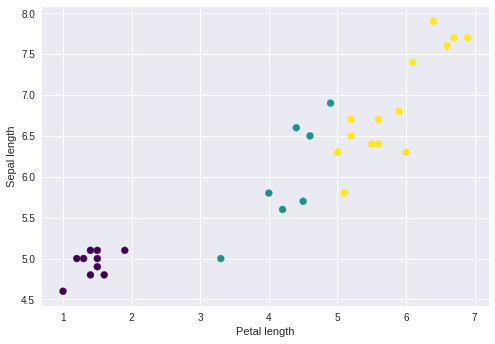

In [20]:
plt.scatter(features['petal_length'],
            features['sepal_length'],
            c=labels,
            cmap='viridis')

plt.xlabel('Petal length');
plt.ylabel('Sepal length');

In [0]:
def pack_features_vector(features, labels):
  features = tf.stack(list(features.values()), axis=1)
  return features, labels

In [0]:
train_dataset = train_dataset.map(pack_features_vector)

In [26]:
features, labels = next(iter(train_dataset))
print(features[:5])

tf.Tensor(
[[6.4 2.8 5.6 2.2]
 [6.9 3.1 4.9 1.5]
 [4.4 2.9 1.4 0.2]
 [4.9 2.4 3.3 1. ]
 [5.1 2.5 3.  1.1]], shape=(5, 4), dtype=float32)


In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4, )),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(3)
])

In [28]:
predictions = model(features)
predictions[:5]

<tf.Tensor: id=279, shape=(5, 3), dtype=float32, numpy=
array([[-0.5831512 , -0.42108378, -1.6992629 ],
       [-0.7775385 , -0.60952747, -1.7872857 ],
       [-0.43463022, -0.4877382 , -0.9454864 ],
       [-0.5289498 , -0.42508802, -1.2209042 ],
       [-0.51124495, -0.49229255, -1.1592968 ]], dtype=float32)>

In [29]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: id=285, shape=(5, 3), dtype=float32, numpy=
array([[0.39944232, 0.46972004, 0.13083772],
       [0.39257857, 0.46440068, 0.14302072],
       [0.39242476, 0.3721276 , 0.23544766],
       [0.38313532, 0.42506838, 0.19179629],
       [0.39336056, 0.40088677, 0.20575267]], dtype=float32)>

In [30]:
print("Prediction: {}".format(tf.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

Prediction: [1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1]
    Labels: [2 1 0 1 1 0 2 0 1 0 0 0 0 1 0 0 2 1 2 2 1 1 0 0 0 1 2 2 1 1 2 2]


In [33]:
def loss(model, x, y):
  y_ = model(x)
  return tf.losses.sparse_softmax_cross_entropy(labels=y, logits=y_)

l = loss(model, features, labels)
print("Loss test {}".format(l))

Loss test 1.2028356790542603


In [0]:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
global_step = tf.Variable(0)

In [39]:
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(global_step.numpy(),
                                         loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.variables), global_step)

print("Step: {},         Loss: {}".format(global_step.numpy(),
                                         loss(model, features, labels).numpy()))

Step: 0, Initial Loss: 1.2028356790542603
Step: 1,         Loss: 1.1808300018310547


In [49]:
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tf.metrics.mean
  epoch_accuracy = tf.metrics.accuracy
  
  for x, y in train_dataset:
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.variables),
                             global_step)
    
    epoch_loss_avg(loss_value)
    epoch_accuracy(tf.argmax(model(x), axis=1, output_type=tf.int32), y)
    
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())
  
  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()
    ))

RuntimeError: ignored

NameError: ignored

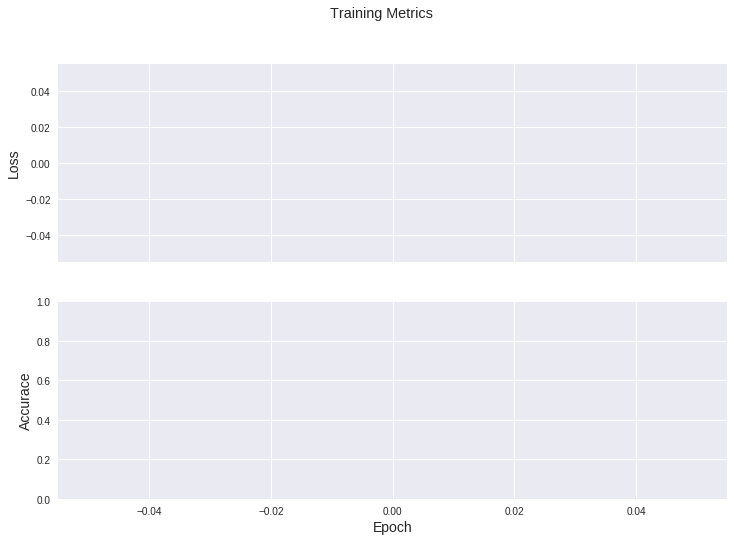

In [50]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accurace", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(training_accuracy_results)